In [20]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [13]:
# Read data into a DataFrame.
data_url = '..\..\datasets\offenses_known_to_law_enforcement_california_by_city_2013.csv'
data = pd.read_csv(data_url, index_col=0)
data.head()

,Population,Violent_crime,Murder,Rape,Robbery,Assault,PropertyCrime,Burglary,Larseny,CarTheft,Arson
City,,,,,,,,,,,
Adelanto,"31,165",198,2.0,15.0,52,129,886,381,372,133,17
Agoura Hills,"20,762",19,0.0,2.0,10,7,306,109,185,12,7
Alameda,"76,206",158,0.0,10.0,85,63,"1,902",287,"1,285",330,17
Albany,"19,104",29,0.0,1.0,24,4,557,94,388,75,7
Alhambra,"84,710",163,1.0,9.0,81,72,"1,774",344,"1,196",234,7


In [24]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ Population+Violent_crime+Murder+Rape+Robbery+Assault+Burglary+Larseny+CarTheft+Arson'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()
lm.summary()

ValueError: shapes (461,422) and (461,422) not aligned: 422 (dim 1) != 461 (dim 0)

Let's look at the coefficients of our model.

And at the p-values as a significance test for each of the coefficients.

In [16]:
lm.pvalues

ValueError: shapes (461,422) and (461,422) not aligned: 422 (dim 1) != 461 (dim 0)

Finally, here's our $R^2$:

In [6]:
lm.rsquared

0.89721063817895219

From the p-values, we see the p-value for Newspaper is greater than .05, suggesting that there is probably no effect for that feature – and that dropping it would not adversely affect the $R^2$.

### Drill: dropping features and re-fitting

Since the p-value for Newspaper indicates that it probably has no effect, try re-fitting the model without the Newspaper feature.  How much does the R^2 change?  Do the other parameters change?

In [1]:
# Re-fit the model here.



## Confidence intervals

Not only do we get parameter estimates and p-values, we also get error estimates that give us **confidence intervals**, the range of values within which our population parameter is likely to fall.  A 95% confidence interval is the default value in most software packages – it indicates that if we re-sampled the population over and over again, 95% of the time our estimates for that parameter would fall within that interval.  That information, in turn, can be used to estimate the confidence interval for our predicted value so that we not only know what value we expect, but with what level of certainty we can expect it.

In [10]:
lm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


Column '0' is the lower bound of the 95% confidence interval and column '1' is the upper bound.  A confidence interval that contains 0 is a sign that the parameter is not explaining significant variance in the outcome.  The wider the confidence intervals are, the more uncertainty there is about the model estimates.  

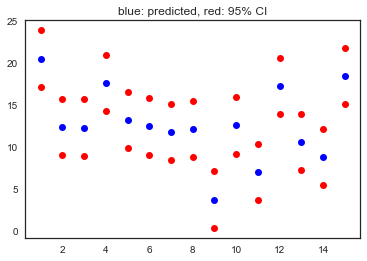

In [11]:
# Use wls_prediction_std to build confidence intervals
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()

If the level of precision offered by your confidence intervals is insufficient for your goals, you may need to add additional significant features to account for more variance.